In [1]:
import numpy as np
from qiskit import assemble, pulse, QuantumCircuit,\
                   schedule, transpile
from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.pulse.library import Gaussian
from qiskit.test import mock
from qiskit.visualization import plot_histogram
from qiskit.visualization.pulse_v2 import draw
from qiskit import pulse
from qiskit.pulse import DriveChannel
# fake quantum computer we're using
backend = mock.FakeArmonk()

# hide pulsesimulator warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
dc0 = DriveChannel(0)
GHz = 1.0e9

In [3]:
c_gate = Gate(name='Custom', label='C', num_qubits=1, params=[])

In [4]:
amp = 0.99999
duration = 320
sigma = 80

In [5]:
with pulse.build(backend) as gate_pulse:
    
    pulse.shift_phase(np.pi/5,dc0)
    pulse.play(pulse.Gaussian(duration,amp,sigma,name='custom'),dc0)

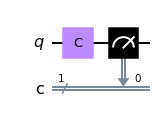

In [6]:
qc = QuantumCircuit(1,1)
qc.append(c_gate,[0])
qc.measure(0,0)
qc.draw('mpl')

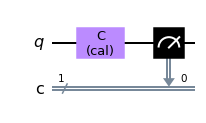

In [7]:
qc.add_calibration('Custom',[0],gate_pulse)
qc.draw('mpl')

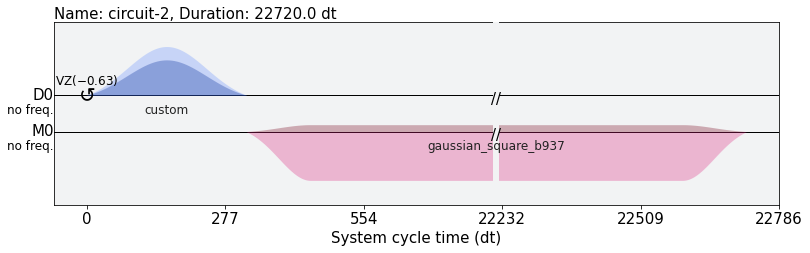

In [8]:
qc_t = transpile(qc,backend)
qc_sched = schedule(qc_t,backend)
qc_sched.draw()

In [9]:
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel

backend_sim = PulseSimulator.from_backend(backend)
backend_model=PulseSystemModel.from_backend(backend)

In [10]:
pulse_qobj = assemble(qc_sched,backend_sim)

In [11]:
job = backend_sim.run(pulse_qobj, backend_model)

In [12]:
results = job.result()

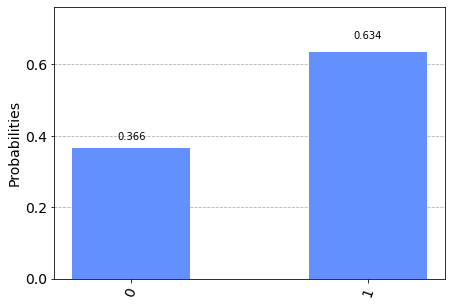

In [13]:
plot_histogram(job.result().get_counts())

# Finding Gate parameters for the desired Statevector

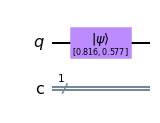

In [30]:
q = QuantumCircuit(1,1)

state = [np.sqrt(2/3),np.sqrt(1/3)]
q.initialize(state,[0])
q.draw('mpl')

In [27]:
q_t = transpile(q,backend)

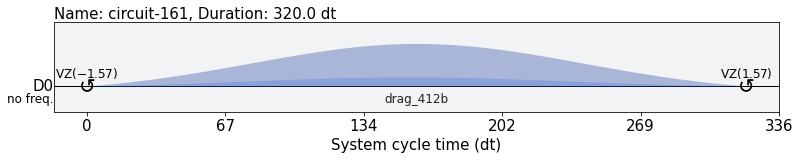

In [31]:
q_sched = schedule(q_t,backend)
q_sched.draw()

In [32]:
q_sched.instructions

((0, ShiftPhase(1.5707963268, DriveChannel(0))),
 (0,
  Play(Drag(duration=320, amp=(0.37526098415448106-0.08060535276562332j), sigma=80, beta=-0.9829945644928844, name='drag_412b'), DriveChannel(0), name='drag_412b')),
 (320, ShiftPhase(-1.5707963268, DriveChannel(0))))

In [70]:
gate_matrix = np.array([[1,0],[0,-1]])